In [5]:
#Importing libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Frequently Admitted Patients: Who are they? 
## The characteristics of patients frequently admitted to medical centers in the US. 

In [6]:
#Loading original data into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
#Printing first three observations
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [7]:
#Printing last three observations
df.tail(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [8]:
#Checking dataset's size
df.shape

(101766, 50)

In [9]:
#Keeping only first encounter based on patient nbr
df2=df.drop_duplicates(['patient_nbr'], keep = 'first')
#Checking dataset's size after removing duplicates 
df2.shape

(71518, 50)

In [10]:
#Replacing '?' to Not a Number (NaN)
df2 = df2.replace('?', np.nan)
#Printing first five observations
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
#Counting % of NaN in each column
((df2.isnull() | df2.isna()).sum() * 100 / df2.index.size).round(4)

encounter_id                 0.0000
patient_nbr                  0.0000
race                         2.7238
gender                       0.0000
age                          0.0000
weight                      96.0108
admission_type_id            0.0000
discharge_disposition_id     0.0000
admission_source_id          0.0000
time_in_hospital             0.0000
payer_code                  43.4059
medical_specialty           48.2074
num_lab_procedures           0.0000
num_procedures               0.0000
num_medications              0.0000
number_outpatient            0.0000
number_emergency             0.0000
number_inpatient             0.0000
diag_1                       0.0154
diag_2                       0.4111
diag_3                       1.7129
number_diagnoses             0.0000
max_glu_serum                0.0000
A1Cresult                    0.0000
metformin                    0.0000
repaglinide                  0.0000
nateglinide                  0.0000
chlorpropamide              

In [12]:
#Droping columns with NaN that account more than 40%
df3 = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
#Printing first three observations after removing three columns ('weight', 'payer_code', 'medical_specialty')
df3.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO


In [13]:
#Dropping rows in columns Race with NaN
df4 = df3.dropna(subset = ["race"])
((df4.isnull() | df4.isna()).sum() * 100 / df4.index.size).round(4)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglit

In [14]:
#Priniting object types of dataset
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [15]:
#Priniting count of unique entries in gender column
df4['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [16]:
#Dropping row that gender is not Female or Male
df4a=df4[df4['gender'] !='Unknown/Invalid']
df4a['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

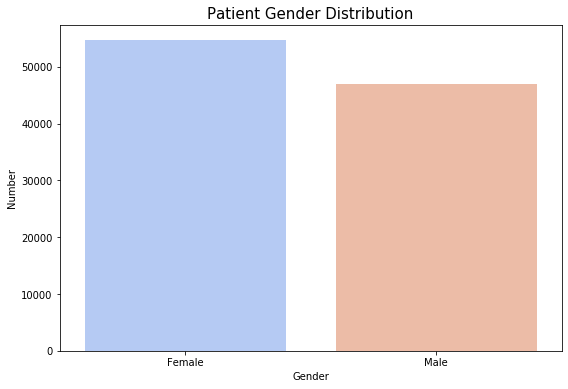

In [17]:
#Bar chart of all patients by gender
fig = plt.figure(figsize=(9,6))
sns.countplot(x='gender', data=df4a, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('Patient Gender Distribution', fontsize=15)
plt.show()

In [18]:
#Filltering Female by using query function 
df4b = df4a.query('gender=="Female"')
df4b.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
#count the number of female patients by race 
df4b.groupby(['race']).size()

race
?                   1133
AfricanAmerican    11728
Asian                318
Caucasian          39689
Hispanic            1092
Other                748
dtype: int64

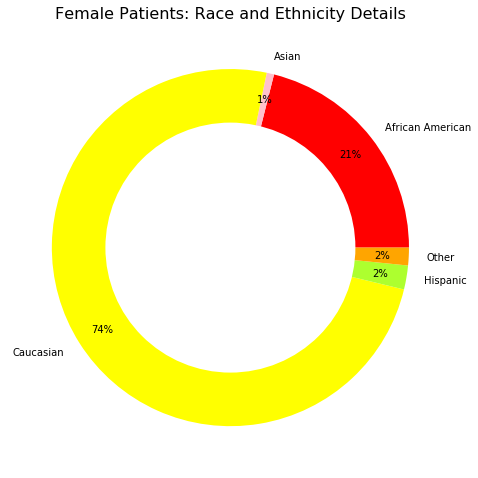

In [20]:
#Donut chart of female patients by race and ethnicity details

fig = plt.figure(figsize=(8,9))
Race = ['African American', 'Asian', 'Caucasian', 'Hispanic', 'Other']
num_race = [7678, 243, 27146, 790, 583]

colors = ['#FF0000', 'pink', '#FFFF00','#ADFF2F', 'orange']
plt.pie(num_race, colors=colors, labels=Race,
        autopct='%1.0f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Female Patients: Race and Ethnicity Details', fontsize=16)
  
plt.show()


In [22]:
df5 = df4b.query('race== "Caucasian"')
df5a = df5.groupby(['age']).count()
df5a.head(10)

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
age,,,,,,,,,,,,,,,,,,,,,
[0-10),71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
[10-20),249,249,249,249,249,249,249,249,249,249,...,249,249,249,249,249,249,249,249,249,249
[20-30),643,643,643,643,643,643,643,643,643,643,...,643,643,643,643,643,643,643,643,643,643
[30-40),1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,...,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
[40-50),2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,...,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927
[50-60),5559,5559,5559,5559,5559,5559,5559,5559,5559,5559,...,5559,5559,5559,5559,5559,5559,5559,5559,5559,5559
[60-70),7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,...,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893
[70-80),10754,10754,10754,10754,10754,10754,10754,10754,10754,10754,...,10754,10754,10754,10754,10754,10754,10754,10754,10754,10754
[80-90),8729,8729,8729,8729,8729,8729,8729,8729,8729,8729,...,8729,8729,8729,8729,8729,8729,8729,8729,8729,8729


Text(0.5, 1.0, 'Patient Age Distribution (Female Caucasian)')

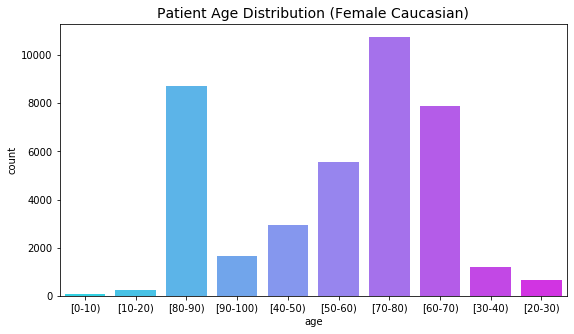

In [32]:
#Chart of Female Patient Age Distribution (Caucasian)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='age', data=df5, palette='cool')
plt.title("Patient Age Distribution (Female Caucasian)", fontsize=14)

Text(0.5, 1.0, 'Length of Hospitalization (Female Caucasian)')

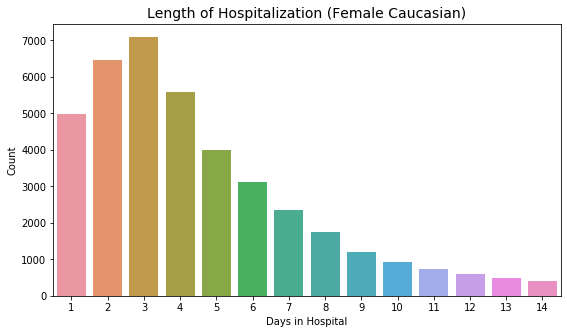

In [24]:
#Chart of Length of Hospitalization (Female Caucasian)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='time_in_hospital', data=df5)
plt.xlabel("Days in Hospital")
plt.ylabel("Count")
plt.title("Length of Hospitalization (Female Caucasian)", fontsize=14)

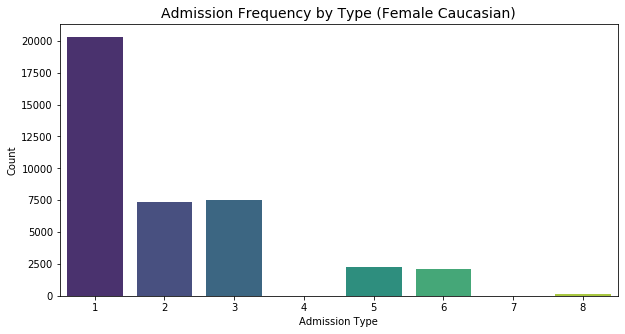

In [25]:
#Chart of Admission Frequency by Type (Female Caucasian)
#1 ->Emergency
#2 ->Urgent
#3 ->Elective
#4 ->Newborn
#5 ->Trauma Center 
#6 thru 8->Reserved
#9 ->Unknown
plt.figure(figsize=(10,5))
sns.countplot(x='admission_type_id', data=df5, palette='viridis')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title("Admission Frequency by Type (Female Caucasian)", fontsize=14)
plt.show()

In [ ]:
# I wasn't able to add legend or rename numbers 

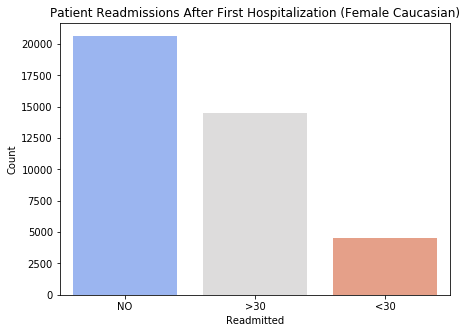

In [33]:
#Bar chart of all Caucasian Female patients by readmition 
#30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df5, palette='coolwarm')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Patient Readmissions After First Hospitalization (Female Caucasian)')
plt.show()